In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

In [5]:
data = pd.read_csv("../datasets/PCA.csv")
samples = data['Sample'].values
spectra = data.drop(columns=['Device', 'Folder', 'Temp', 'Sample']).values

spectra = (spectra - spectra.mean(axis=0)) / spectra.std(axis=0)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(samples)

In [6]:
num_classes = len(np.unique(encoded_labels))

inputs = Input(shape=(spectra.shape[1],))
x = Dense(512, activation='relu')(inputs)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
X_train, X_val, y_train, y_val = train_test_split(spectra, encoded_labels, test_size=2/11)
history = model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=100,
          batch_size=32)
        #   callbacks=[EarlyStopping(patience=5)])

Epoch 1/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.4894 - val_accuracy: 0.9450 - val_loss: 0.2271
Epoch 2/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9042 - loss: 0.3220 - val_accuracy: 0.9368 - val_loss: 0.1958
Epoch 3/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9117 - loss: 0.2739 - val_accuracy: 0.9317 - val_loss: 0.2168
Epoch 4/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.3051 - val_accuracy: 0.9258 - val_loss: 0.2233
Epoch 5/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9205 - loss: 0.2608 - val_accuracy: 0.9313 - val_loss: 0.2321
Epoch 6/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9165 - loss: 0.2594 - val_accuracy: 0.9184 - val_loss: 0.2552
Epoch 7/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9303 - loss: 0.2159 - val_accuracy: 0.9225 - val_loss: 0.2444
Epoch 8/100
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9219 - loss: 0.2681 - val_accu

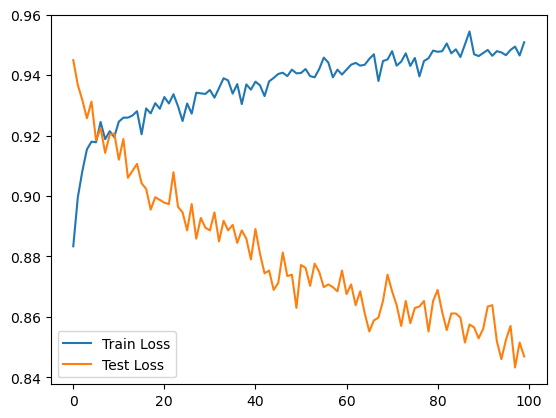

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Test Loss')
plt.legend()
plt.show()

In [8]:
def find_similar_classifier(model, query_spectrum, top_n=3):
    query = (query_spectrum - spectra.mean(axis=0)) / spectra.std(axis=0)
    probs = model.predict(np.array([query]))[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]
    return label_encoder.inverse_transform(top_indices), probs[top_indices]

In [9]:
spec_id = 2048
my_spectrum = X_val[spec_id]
top_n = 3

finded_classes = find_similar_classifier(model, my_spectrum, top_n)

print(f"Sample <{data["Sample"].iloc[spec_id]}>({spec_id}) test for {top_n} classes:")
for i in range(top_n):
    print(f"    <{finded_classes[0][i]}> by {finded_classes[1][i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Sample <AISI 1010>(2048) test for 3 classes:
    <ug6d> by 0.9970253109931946
    <ug26-2> by 0.002497905632480979
    <55G18YU3> by 0.00019666254229377955
